# Theoretical Part

## 1. Functional Programming (5p)

### The code:

URL = "https://raw.githubusercontent.com/mt4007-ht23/data/main/cell_phones_total.csv"  
data = pd.read_csv(URL)  
unique_values_per_column = data.apply(lambda x: x.unique())  


### Answer:  

About a functional language, I can provide an example from my homework 4 where I used functional programming to find the unique values in each column of a pandas DataFrame as the code above.   
According to the official documentation, series.unique() will return unique values of a Series object in the order of appearance. This function is deterministic because calling it with the same arguments will always produce the same result. Moreover, this function has no side effects; it doesn't modify any external state or rely on external variables. Therefore, series.unique() is a pure function.  
Regarding immutability, Objects passed to the function dataframe.apply() are Series objects whose index is the DataFrame’s index (axis=0) by default which means apply function to each column. And the length of a Series cannot be changed after it is created, so the Series object x here is immutable.  
In the end, we can see that I applied a pure function to a size-immutable object, making the code easy to understand, reason about, and modify if needed.  

## 2. SQL (5p)

### SQL query:  

SELECT StudentID, SUM(Grade * Credits)  AS  the_average_grade  
FROM StudentsGrades  
GROUP BY StudentID;  

### Explaining the significance of grouping data in SQL :  
**Aggregation and Conditional Aggregation:**  
Grouping allows the application of aggregate functions (such as SUM, AVG) on subsets of data instead of the entire dataset. This enables the calculation of summary statistics and metrics for specific groups. Conditional aggregation can also be applied. For instance, in my query, I calculate the weighted sum of Grade and Credits for each student.

**Enhancing Readability:**  
Grouping enhances the readability of query results by organizing data into manageable chunks. This makes it easier to interpret and understand information. As demonstrated in my example above, queries become more straightforward, requiring fewer lines to accomplish complex calculations.

**Performance Optimization:**  
Grouping contributes to performance optimization by enabling the database engine to process and aggregate data more efficiently. It reduces the amount of data that needs to be processed for certain operations. In my example, the sum of the products of Grade and Credits is aggregated separately for each student, minimizing the data processing requirements.

## 3. RegEx (5p)

1, (\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - This matches the timestamp in the format "YYYY-MM-DD HH:MM:SS".

2, (GET|POST|PUT|PATCH|DELETE) - - This matches the HTTP request type, as one of GET, POST, PUT, PATCH, or DELETE.

3, (\/.+) - This matches the resource path, starting with a forward slash ("/"). The .+ matches one or more of any character (except for a newline).

4, Status (\d{3}) - This matches the HTTP status code (three digits after "Status ").

5, ResponseTime (\d+)ms - This matches the response time in milliseconds. It looks for the substring "ResponseTime " followed by one or more digits and the characters "ms".

In [221]:
import re

log = "2024-01-05 15:20:30 - GET - /users/1234 - Status 200 - ResponseTime 120ms"

pattern = re.compile(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - (GET|POST|PUT|PATCH|DELETE) - (\/.+) - Status (\d{3}) - ResponseTime (\d+)ms')

matches = pattern.match(log)

if matches:
    print(f"timestamp: {matches.group(1)}")
    print(f"request type: {matches.group(2)}")
    print(f"resource path: {matches.group(3)}")
    print(f"HTTP status code: {matches.group(4)}")
    print(f"response time: {matches.group(5)}ms")
else:
    print("can not find match.")

timestamp: 2024-01-05 15:20:30
request type: GET
resource path: /users/1234
HTTP status code: 200
response time: 120ms


# Practical Part

## 4. Monkeypox (10p)

<span style="font-size: larger; color: #000;">&bull;</span> **List the top 5 countries with highest number of total confirmed cases (ConfCases). Generate the following table. (2p)**  
We first create a dataframe with the aggregated data, namely the number of total confirmed cases grouped by country. Then we display the top five in this dataframe.

In [222]:
import pandas as pd
import matplotlib.pyplot as plt 

URL = "https://raw.githubusercontent.com/mt4007-ht23/data/main/exam_data/monkeypox.csv"
monkeypox = pd.read_csv(URL)

# for the better understanding of data, we display the first 5 rows of the dataset.
print(monkeypox.head().to_markdown())

# create a dataframe which has the  number of total confirmed cases grouped by countries. 
# as_index=False: keep the grouping columns as regular columns in the resulting DataFrame.
totalConfCases = monkeypox.groupby("CountryExp", as_index=False)["ConfCases"].sum()

# We only print out the top five countries with highest number of total confirmed cases
print(totalConfCases.sort_values(by = "ConfCases", ascending=False).head().to_markdown(index=False))

|    | DateRep    | CountryExp   | CountryCode   |   ConfCases |
|---:|:-----------|:-------------|:--------------|------------:|
|  0 | 2022-05-09 | Austria      | AT            |           0 |
|  1 | 2022-05-09 | Belgium      | BE            |           0 |
|  2 | 2022-05-09 | Bulgaria     | BG            |           0 |
|  3 | 2022-05-09 | Croatia      | HR            |           0 |
|  4 | 2022-05-09 | Cyprus       | CY            |           0 |
| CountryExp   |   ConfCases |
|:-------------|------------:|
| Spain        |        4942 |
| Germany      |        2887 |
| France       |        2423 |
| Netherlands  |         959 |
| Portugal     |         710 |


<span style="font-size: larger; color: #000;">&bull;</span> **Visualise the total number of cases per week. Recreate the following figure.**  

Here we create a new dataframe that has the data of the number of weekly confirmed cases, then we visualize it with a bar plot.


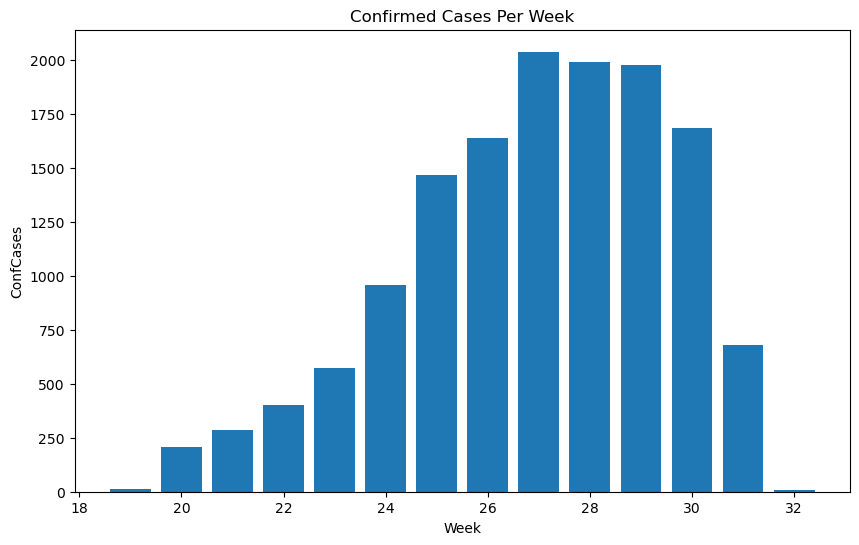

In [223]:
# Convert the "DateRep" column to a datetime object
monkeypox["DateRep"] = pd.to_datetime(monkeypox["DateRep"])

# Create a new column for the week
monkeypox["Week"] = monkeypox["DateRep"].dt.to_period('W')

# create a dataframe which has the  number of total confirmed cases grouped by countries. 
totalConfCases_weekly = monkeypox.groupby("Week", as_index=False)["ConfCases"].sum()

# create a new column with week number
Week_num = dict(zip(totalConfCases_weekly["Week"],  list(range(19, 33))))
totalConfCases_weekly["weekNum"] = totalConfCases_weekly["Week"].map(Week_num)

plt.figure(figsize=(10, 6))
plt.bar(totalConfCases_weekly["weekNum"],totalConfCases_weekly["ConfCases"])
plt.title('Confirmed Cases Per Week')
plt.xlabel('Week')
plt.ylabel('ConfCases')
plt.show()

<span style="font-size: larger; color: #000;">&bull;</span> **Webscrape the following link for population data. The year 2022 is enough. Visualise the total number of cases per 100 000 inhabitant and per country. That is, generate the following plot. (6p)**

We obtained a dictionary from web scraping and attempted to map the information to the 'totalConfCases' DataFrame.   
However, I encountered difficulty converting the dictionary to numeric values in a timely manner, so this part remains unresolved.

In [224]:
import requests
from bs4 import BeautifulSoup

URL = "https://www.populationu.com/gen/population-by-country"
page = requests.get(URL)

bs = BeautifulSoup(page.content, "lxml")
table = bs.find('table', class_='ptable2')
population_all = {}
for row in table.find_all('tr')[1:-1]: # ignore first row as header and last row "world"
    columns = row.find_all('td')
    country_name = columns[0].text.strip()
    population_2022 = columns[2].text.strip()
    population_all[country_name] = population_2022

In [225]:
#combined_data.loc[:, "num_per_cap"] = round(combined_data["n_cellphones"] / combined_data["population"], 5)

totalConfCases["population"] = totalConfCases["CountryExp"].map(population_all)

# Convert 'col1' to numeric
#s = totalConfCases["population"]
#pd.to_numeric(s)
#totalConfCases.info()
#totalConfCases["population"] = totalConfCases["population"].astype(int)
#totalConfCases["numPer"] = round((totalConfCases["ConfCases"] / totalConfCases["population"])*100000, 5)
#totalConfCases.info()
# data.plot.barh(ax=axes[1], color="black", alpha=0.7)  Horizonal bar plot

## 5. Data Storage (10p)

<span style="font-size: larger; color: #000;">&bull;</span> **Read in the file studentlog.txt using any method you want and deal with missing entries. Explain your procedure. (4p)**

We can identify missing values by running the code "studentlog.info()". There are 6 NAs in the 'difficulty' column, 2 in 'name', and 2 in 'grade'. We can address the 6 NAs in 'difficulty' by finding the corresponding values in the dataframe. However, for the remaining NAs in 'name' and 'grade,' we cannot handle them without further information. Therefore, we leave them as NA.

In [226]:
# Read the file
url = "https://raw.githubusercontent.com/mt4007-ht23/data/main/exam_data/studentlog.txt"
studentlog = pd.read_table(url)

# drop the duplicated index column "Unnamed: 0"
studentlog = studentlog.drop('Unnamed: 0', axis=1)

# We can identify the missing values by running the code below. 6 NA in difficulty, 2 in name and 2 in grade.
#studentlog.info()

# deal with 6 NA values in column difficulty
sorted_studentlog = studentlog.sort_values(by='difficulty', na_position='first')
print(sorted_studentlog.head(6).to_markdown())

# after run the codes below we get the values to fill the na values
#print(studentlog[studentlog['name'] == "General Physics II – Electricity and Magnetism"])  5
#print(studentlog[studentlog['name'] == "Introduction to Quantum Mechanics I"]) 5
#print(studentlog[studentlog['name'] == "Introduction to Modern Physics"]) 1
#print(studentlog[studentlog['name'] == "Elementary Differential Equations"]) 2
#print(studentlog[studentlog['name'] == "Introduction to Nuclear and Particle Physics"]) 5

#fill the na values 
studentlog.iloc[168:, 3] = 5
studentlog.iloc[322:, 3] = 5
studentlog.iloc[545:, 3] = 5
studentlog.iloc[1320:, 3] = 1
studentlog.iloc[1363:, 3] = 2
studentlog.iloc[1628:, 3] = 5

# fill 2 NAs in grade 
studentlog['grades'] = studentlog['grades'].fillna(0)

studentlog.info()

|      |   id | name                                           |   credits |   difficulty |   grades | student       |
|-----:|-----:|:-----------------------------------------------|----------:|-------------:|---------:|:--------------|
|  168 |   83 | General Physics II – Electricity and Magnetism |         4 |          nan |        4 | Billy Turner  |
|  322 |   43 | Introduction to Quantum Mechanics I            |         3 |          nan |        4 | Benjamin Hill |
|  545 |   66 | Introduction to Quantum Mechanics I            |         3 |          nan |        5 | Joe Allen     |
| 1320 |    9 | Introduction to Modern Physics                 |         3 |          nan |        3 | John Smith    |
| 1363 |   37 | Elementary Differential Equations              |         3 |          nan |        3 | Stephen King  |
| 1628 |   39 | Introduction to Nuclear and Particle Physics   |         3 |          nan |        5 | Larry Green   |
<class 'pandas.core.frame.DataFrame'>
RangeIndex

<span style="font-size: larger; color: #000;">&bull;</span> **Create an SQL query that genenrates a Student and Course table**  
<span style="font-size: larger; color: #000;">&bull;</span> **Populate the tables with the data from studentlog.txt**   

We have created two tables, 'Student' and 'Course,' using a SQL query. Then, we use the to_sql method to populate the SQL tables with data from the Pandas DataFrame we loaded before.  

In [227]:
import sqlite3 as sql

# Connect to SQLite in-memory database 
conn = sql.connect(r"C:\Users\catri\OneDrive\文档\LIWU\exam\studentlog.db")
cur = conn.cursor()

# Create two tables in the database
#cur.execute("CREATE TABLE student (id INT PRIMARY KEY,student TEXT,grades INT)")
#cur.execute("CREATE TABLE Course (name TEXT,credits INT,difficulty INT, PRIMARY KEY (name, credits))")

# Query to retrieve the list of tables and their schema to know more about the database
tables = list(cur.execute("SELECT name FROM sqlite_master WHERE type='table';"))

# Create Pandas DataFrames for the two tables
student_data = studentlog.iloc[:,[0,5,4]]
course_data = studentlog.iloc[:,[1,2,3]]

#Use the to_sql method to populate the SQL tables with data
student_data.to_sql('student', conn, index=False, if_exists='replace')  # Use if_exists='append' if you want to append to an existing table
course_data.to_sql('Course', conn, index=False, if_exists='replace') 

1881

<span style="font-size: larger; color: #000;">&bull;</span> **Create a plot that illustrates the most difficult classes. It is up to you to decide what difficult entails. Explain your analysis**  

For the most difficult classes or courses, I propose that the 'difficulty' column should have a value of 5, and the average grades obtained by students should be the lowest, indicating the challenging nature of these courses. According to my definition of difficulty, I have identified the final five courses, as shown in the table below. I assume that no plot is needed based on the simplicity of the table.


In [220]:
# Filter courses where difficulty  is equal to 5
filtered_studentlog = studentlog[studentlog['difficulty'] == 5]
filtered_studentlog.head()

result = studentlog.groupby("name", as_index=False)["grades"].mean()
sorted_result = result.sort_values(by='grades')
difficult_courses = sorted_result.iloc[0:5,:]

print(difficult_courses.to_markdown())

|    | name                                     |   grades |
|---:|:-----------------------------------------|---------:|
|  3 | Classical Mechanics                      |  2.21212 |
|  7 | Fundamentals of Analysis II              |  2.21212 |
| 13 | Introduction to Modern Physics           |  2.21212 |
|  2 | Calculus for Science and Engineering III |  2.21429 |
| 17 | Introduction to Solid State Physics      |  2.27907 |


## 6. Algorithmic Trading (10p)
did not have enough time to do this part.